In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. NC Well Metals/P1011.2. Analyses/P1011.2.3. ML Visualizations/P1011.2.3.2. Variable Importance Plots/Output')
cur_date = "051724"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

# reading in files
as_var_imp_df = data.frame(read_excel("Input/As_SVM_Variable_Importance_051624.xlsx"), Outcome = "Arsenic") 
mn_var_imp_df = data.frame(read_excel("Input/Mn_SVM_Variable_Importance_051724.xlsx"), Outcome = "Manganese") 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
head(as_var_imp_df)

,Variable,Importance,Use_Case,Kernel,Outcome
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Longitude,0.7834660,1,svmLinear,Arsenic
2,Landuse_CondensedF,0.4633086,1,svmLinear,Arsenic
3,Landuse_CondensedD,0.4402017,1,svmLinear,Arsenic
4,pH,0.4203101,1,svmLinear,Arsenic
5,Rock_TypeM,0.4135176,1,svmLinear,Arsenic
6,Soil_Type_CondensedH,0.3699656,1,svmLinear,Arsenic


Plotting variable importance of the top performing models, which was SVM with a linear kernel predicting As detection and SVM with a radial kernel predicting Mn detection. Both of the top performing models were for use case one, which included all the variables in the dataset.

In [3]:
# creating 1 df
var_imp_df = rbind(as_var_imp_df, mn_var_imp_df) %>%
    # only plotting for the first use case
    filter(Use_Case == 1, Kernel == "svmLinear" & Outcome == "Arsenic" | Kernel == "svmRadial" & Outcome == "Manganese") %>%
    # cleaning up the predictor names
    mutate(Variable = gsub("_", " ", Variable),
           Variable = gsub(" Condensed", "", Variable), 
           Variable = ifelse(Variable == "LanduseF", "Land use - Forest", 
                           ifelse(Variable == "LanduseD", "Land use - Developed", 
                                 ifelse(Variable == "LanduseS", "Land use - Shrub/Scrub",
                                       ifelse(Variable == "LanduseG", "Land use - Grass",
                                             ifelse(Variable == "LanduseC", "Land use - Crop", 
                                                   ifelse(Variable == "Soil TypeD", "Soil Type - Dystrudepts",
                                                         ifelse(Variable == "Soil TypeH", "Soil Type - Hapludults",
                                                               ifelse(Variable == "Soil TypeK", "Soil Type - Kanhapludults",
                                                                      ifelse(Variable == "Soil TypeNA", "Soil Type - Other",
                                                                          ifelse(Variable == "Rock TypeG", "Rock Type - Granite",
                                                                                 ifelse(Variable == "Rock TypeGP", "Rock Type - Granite/Pluton",
                                                                                        ifelse(Variable == "Rock TypeMV", "Rock Type - Metavolcanics",
                                                                                               ifelse(Variable == "Rock TypeM", "Rock Type - Mudstone",
                                                                      Variable))))))))))))))
    

head(var_imp_df)

,Variable,Importance,Use_Case,Kernel,Outcome
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Longitude,0.7834660,1,svmLinear,Arsenic
2,Land use - Forest,0.4633086,1,svmLinear,Arsenic
3,Land use - Developed,0.4402017,1,svmLinear,Arsenic
4,pH,0.4203101,1,svmLinear,Arsenic
5,Rock Type - Mudstone,0.4135176,1,svmLinear,Arsenic
6,Soil Type - Hapludults,0.3699656,1,svmLinear,Arsenic


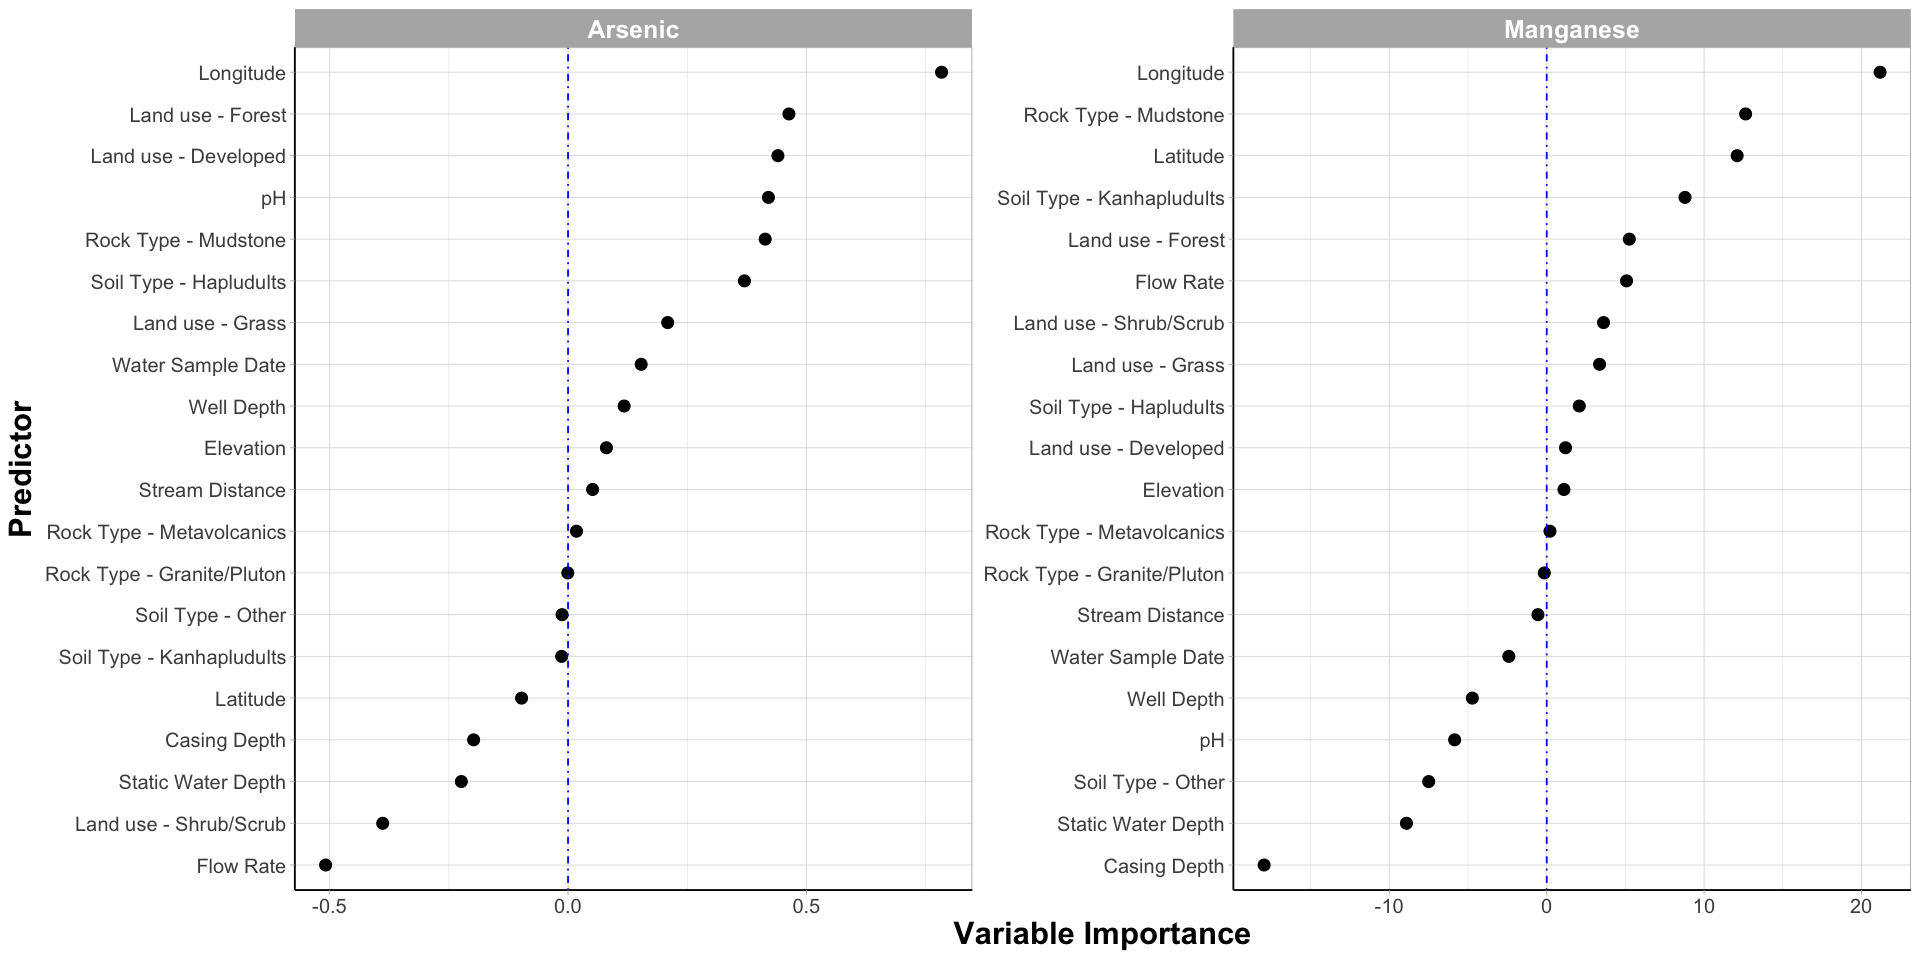

In [4]:
options(repr.plot.width=16, repr.plot.height=8) #changing size

ggplot() + 
  geom_point(data = var_imp_df %>%
                 filter(!grepl("noise", Variable)), 
             aes(x = Importance, y = reorder_within(Variable, Importance, Outcome)), size = 3) + 

  geom_vline(xintercept = 0, color = "blue", linetype = "dotdash") +

  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Outcome, scales = "free") + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance', y = 'Predictor') + #changing axis labels 
  
  #removing size legend
  guides(size = "none")